In [1]:
# Data Processing
import re
import numpy as np # linear algebra
import pandas as pd # data processing
import nltk
from nltk import word_tokenize
nltk.download('punkt')

# Modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#get the csv file from github
train_url = 'https://raw.githubusercontent.com/gregoriusavip/AI-text-classifier/data-cleansing/training_model/dataset/twitter_training.csv'
validate_url = 'https://raw.githubusercontent.com/gregoriusavip/AI-text-classifier/data-cleansing/training_model/dataset/twitter_validation.csv'

#or download the data and change the url to the files' path from https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

#Since the data has no header, header set to None
train = pd.read_csv(train_url, header = None)
validate = pd.read_csv(validate_url, header = None)

In [3]:
#Set the header for train
train.columns = ['id', 'information', 'sentiment', 'text']
train.head()

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
#Set the header for validate
validate.columns = ['id', 'information', 'sentiment', 'text']
validate.head()

,id,information,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [30]:
#Create a copy so the original data is not getting changed
train_data = train
validate_data = validate

In [31]:
#Check if there are null data on the datasets
print(train_data.isnull().sum())
print(validate_data.isnull().sum())

id               0
information      0
sentiment        0
text           686
dtype: int64
id             0
information    0
sentiment      0
text           0
dtype: int64


In [32]:
#Remove the null data
train_data = train_data.dropna()
validate_data = validate_data.dropna()
#Check if all null data removed
print(train_data.isnull().sum())
print(validate_data.isnull().sum())

id             0
information    0
sentiment      0
text           0
dtype: int64
id             0
information    0
sentiment      0
text           0
dtype: int64


In [33]:
#Text transformation: Create a new column to store the lowercase of the text
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"]=train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
validate_data["lower"]=validate_data.text.str.lower() #lowercase
validate_data["lower"]=[str(data) for data in validate_data.lower] #converting all to string
validate_data["lower"]=validate_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

<ipython-input-33-642ae539f43d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["lower"]=train_data.text.str.lower() #lowercase
<ipython-input-33-642ae539f43d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
<ipython-input-33-642ae539f43d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [34]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30435


In [49]:
# pull the data into vectors
vectorizer = CountVectorizer(tokenizer=word_tokenize)
x_train, x_test = train_test_split(train_data, test_size=0.2, random_state=0)

#encode based of the lowercase column
x_train_encode = vectorizer.fit_transform(x_train.lower)
x_test_encode = vectorizer.transform(x_test.lower)

#Labels for train and test
y_train = x_train['sentiment']
y_test = x_test['sentiment']

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [50]:
#Total of registers per category
y_test.value_counts() / y_test.shape[0]

Negative      0.300338
Positive      0.284257
Neutral       0.243716
Irrelevant    0.171689
Name: sentiment, dtype: float64

In [52]:
# create a Multinomial Naive Bayes Classifier object
mnb = MultinomialNB()

# fit the classifier to the training data
mnb.fit(x_train_encode, y_train)

MultinomialNB()

In [53]:
# Calculate the accuracy using Multinomial model and the test data
mnb_test_predict = mnb.predict(x_test_encode)
accuracy = accuracy_score(y_test, mnb_test_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7518243243243243


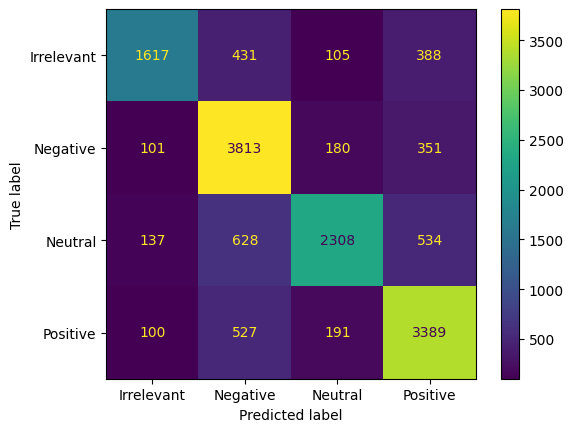

In [54]:
# Create the confusion matrix
cm = confusion_matrix(y_test, mnb_test_predict)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_).plot()

In [55]:
# calculate the accuracy of the classifier using the validation dataset
x_val_encode = vectorizer.transform(validate_data.lower)
y_val_test = validate_data['sentiment']

val_pred = mnb.predict(x_val_encode)
accuracy = accuracy_score(y_val_test, val_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.806


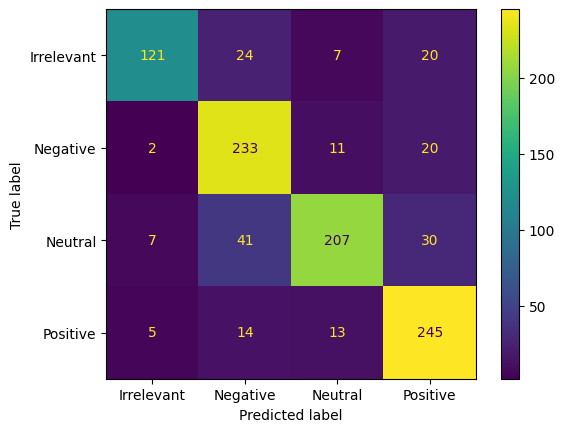

In [56]:
# Create the confusion matrix of the validation data
cm = confusion_matrix(y_val_test, val_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_).plot()

In [57]:
# vectorize but using n-gram of 4
vectorizer = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
x_train_encode = vectorizer.fit_transform(x_train.lower)
x_test_encode = vectorizer.transform(x_test.lower)
x_val_encode = vectorizer.transform(validate_data.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [58]:
# create a Multinomial Naive Bayes Classifier object
mnb2 = MultinomialNB()

# fit the classifier to the training data
mnb2.fit(x_train_encode, y_train)

MultinomialNB()

In [59]:
# Calculate the accuracy using Multinomial model with 4 n-gram and the test data
mnb2_test_predict = mnb2.predict(x_test_encode)
accuracy = accuracy_score(y_test, mnb2_test_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9198648648648649


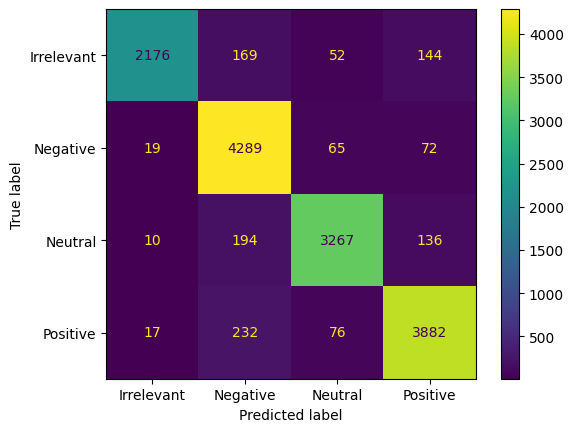

In [60]:
# 4 n-gram confusion matrix with test data
cm = confusion_matrix(y_test, mnb2_test_predict)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb2.classes_).plot()

In [68]:
# 4 n-gram prediction using validation data
val2_pred = mnb2.predict(x_val_encode)
accuracy = accuracy_score(y_val_test, val2_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.976


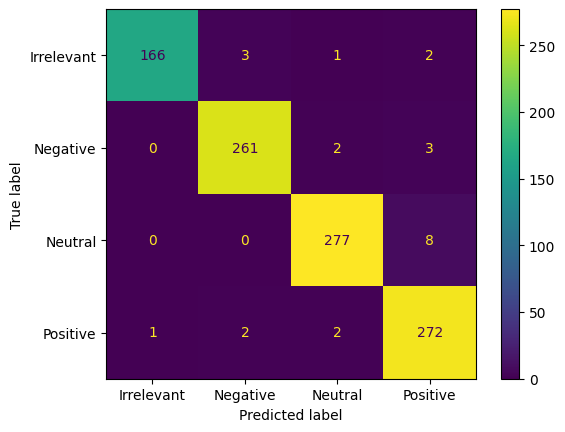

In [62]:
# 4 n-gram confusion matrix with validate data
cm = confusion_matrix(y_val_test, val2_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb2.classes_).plot()